# PART- 2 `( Handling With Missing Vales )`

In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [235]:
pd.options.mode.dtype_backend = 'pyarrow'
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = 100
# pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format

In [236]:
df = pd.read_csv('clean.csv')

In [237]:
df.shape

(26594, 35)

In [238]:
def show_nulls(data):
    
    '''
    
    This function plots missing values for each column by observation in the dataset.
    
    ''' 
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

In [239]:
df.shape

(26594, 35)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26594 entries, 0 to 26593
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               26594 non-null  object 
 1   make                     26594 non-null  object 
 2   model                    26330 non-null  object 
 3   price                    26594 non-null  float64
 4   body_type                26594 non-null  object 
 5   type                     26594 non-null  object 
 6   doors                    26253 non-null  float64
 7   warranty                 26594 non-null  object 
 8   mileage                  26593 non-null  float64
 9   gearbox                  26360 non-null  object 
 10  seller                   26594 non-null  object 
 11  seats                    23633 non-null  float64
 12  engine_size              25251 non-null  float64
 13  gears                    17571 non-null  float64
 14  co2_emissions         

In [241]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

mixed_type_columns = [(x,', '.join(list(df[x].apply(type).unique().astype(str)))) for x in df if df[x].apply(type).nunique() > 1]
one_type_columns = [(x,list(df[x].apply(type).unique())) for x in df if df[x].apply(type).nunique() == 1]

def check_column_types(data):
    for x in data:
        if data[x].apply(type).nunique() > 1:
            print("Column" + " " + color.BOLD + color.RED + str(x) + color.END + " " + "has mixed object types." )
        #elif data[x].apply(type).nunique() == 1:
            #print("Column" + " " + color.BOLD + color.GREEN + str(x) + color.END + " " + "has one object type." )
        #else:
            #print('Error')
check_column_types(df)

Column model has mixed object types.
Column gearbox has mixed object types.
Column drivetrain has mixed object types.
Column comfort_convenience has mixed object types.
Column entertainment_media has mixed object types.
Column safety_security has mixed object types.
Column extras has mixed object types.
Column upholstery has mixed object types.
Column fuel has mixed object types.


In [242]:
df.sample(3)

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude
6702,Renault Megane E-Tech,Renault,Megane E-Tech,47690.00,Sedan,Demonstration,5.00,Yes,9990.00,Automatic,Dealer,5.00,NaN,1.00,NaN,Front,NaN,"360° camera, Armrest, Automatic climate contro...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Adaptive headlights, Blind spot monitor, ...","Alloy wheels, Ambient lighting, Automatically ...",1776.00,Yes,Full leather,1,A+++,218.00,160.00,0.00,NaN,Electric,Germany,"70469, BW, Germany",48.81,9.16
14365,Skoda Superb,Skoda,Superb,22980.00,Station wagon,Used,5.00,No,77489.00,Manual,Dealer,5.00,1395.00,6.00,119.00,NaN,4.00,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, CD player, Digital radio, Hands-fre...","ABS, Adaptive headlights, Bi-Xenon headlights,...","Alloy wheels, Automatically dimming interior m...",1460.00,Yes,Full leather,1,A,150.00,110.00,4.00,5.00,Benzine,Germany,"Niederhofheimer Straße 49, 65719 Hofheim am Ta...",50.09,8.46
8716,Peugeot 508,Peugeot,508,32890.00,Station wagon,Used,5.00,Yes,32606.00,Automatic,Dealer,5.00,1997.00,8.00,122.00,Front,4.00,"360° camera, Armrest, Automatic climate contro...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Adaptive Cruise Control, Adaptive headlig...","Alloy wheels, Ambient lighting, Automatically ...",1615.00,No,Part leather,1,A,163.00,120.00,2.00,4.60,Diesel,Germany,"Bebraer Str 6, 37269 Eschwege, Germany",51.18,10.03


<Figure size 720x360 with 0 Axes>

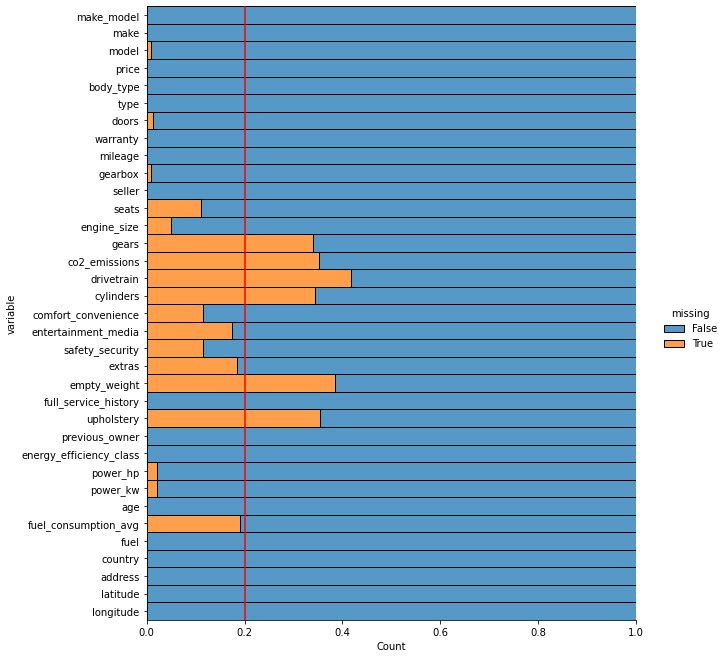

In [243]:
show_nulls(df)

In [342]:
def show_cols_nan():
    missing_values_percentage = (df.isna().sum() / df.shape[0] * 100).to_frame()
    return missing_values_percentage[missing_values_percentage[0] > 0].sort_values(by=0, ascending=True)
show_cols_nan()

,0
longitude,0.04
latitude,0.04
model,0.99
doors,1.28
power_hp,2.11
power_kw,2.15
engine_size,5.05
seats,11.14
comfort_convenience,11.48
safety_security,11.53


In [343]:
# COLUMNS THAT DO NOT HAVE NANS
def full_columns():
    return df.isna().sum()[df.isna().sum() == 0].index.to_list()
full_columns()

['make_model',
 'make',
 'price',
 'body_type',
 'type',
 'warranty',
 'mileage',
 'gearbox',
 'seller',
 'full_service_history',
 'previous_owner',
 'energy_efficiency_class',
 'age',
 'fuel',
 'country',
 'address']

In [247]:
def i(col):
    print(df[col].isna().value_counts())

In [248]:
def first_looking(col):
    print("COLUMN NAME    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [249]:
# ['make_model', 'body_type','age','hp']
def fill_with_mean(col, groups=[]):
    df_copy = df.copy()
    print(df_copy[col].isna().value_counts()) 
    for x in range(len(groups) ,0,-1):
        df_copy[col] = df_copy.groupby(groups[:x])[col].transform(lambda x: x.fillna(x.mean()))
        print(df_copy[col].isna().value_counts()) 
    return df_copy

In [325]:
# ['make_model', 'body_type','age','fuel']
def fill_with_mode(col, groups=[]):
    df_copy = df.copy()
    print(df_copy[col].isna().value_counts()) 
    for x in range(len(groups) ,0,-1):
        print(groups[:x])
        df_copy[col] = df_copy.groupby(groups[:x])[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan)
        print(df_copy[col].isna().value_counts())
    return df_copy

## age

In [251]:
first_looking('age')

COLUMN NAME    :  age
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  83
--------------------------------
age
3.00       3425
4.00       3218
0.00       2834
1.00       2708
2.00       2349
           ... 
72.00         1
76.00         1
66.00         1
-180.00       1
69.00         1
Name: count, Length: 84, dtype: int64


In [252]:
rows_to_drop = df[df.age < 0].index
rows_to_drop

Index([6944, 9685, 18894], dtype='int64')

In [253]:
df.shape

(26594, 35)

In [254]:
df.drop(rows_to_drop, inplace= True)

In [255]:
df.shape

(26591, 35)

In [256]:
df[df.age.isna()]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude
677,Mercedes-Benz E 53 AMG,Mercedes-Benz,E 53 AMG,108900.00,Convertible,Demonstration,2.00,Yes,3856.00,Automatic,Dealer,4.00,2999.00,8.00,219.00,4WD,NaN,"360° camera, Air conditioning, Automatic clima...","Android Auto, Apple CarPlay, Bluetooth, CD pla...","Alarm system, Central door lock, Driver-side a...","Alloy wheels, Ambient lighting, Automatically ...",NaN,No,Full leather,-,-,435.00,320.00,NaN,NaN,Benzine,Belgium,"Avenue de l'Industrie 24, 4500 Huy",50.53,5.26
16598,Toyota Corolla,Toyota,Corolla,33999.00,Compact,Demonstration,5.00,No,2494.00,Automatic,Dealer,NaN,1987.00,NaN,89.00,NaN,4.00,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Daytime running lights, Distance warning ...","Alloy wheels, Automatically dimming interior m...",1315.00,Yes,Cloth,-,-,184.00,135.00,NaN,NaN,Benzine,Netherlands,"Steenbokstraat 3, 7324 AZ Apeldoorn, Netherlands",52.24,5.98


In [257]:
df.loc[df.age.isna() & (df.mileage < 10000),['age']] = 0

In [258]:
df[df.age.isna()]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude


In [271]:
def remove_duplicates():
    print(df.shape)
    df.drop_duplicates(inplace = True)
    df.reset_index(drop=True, inplace=True)
    print(df.shape)

## mileage

In [260]:
df.mileage

0       120200.00
1         5000.00
2        18900.00
3        18995.00
4       197000.00
           ...   
26586    40345.00
26587   145000.00
26588    96000.00
26589    94343.00
26590   230047.00
Name: mileage, Length: 26591, dtype: float64

In [261]:
df.mileage.iloc[0]

120200.0

In [262]:
first_looking('mileage')

COLUMN NAME    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  1
num_of_uniques :  14180
--------------------------------
mileage
10.00        518
1.00         159
5000.00      118
100.00       111
5.00         105
            ... 
30705.00       1
41484.00       1
40687.00       1
92117.00       1
230047.00      1
Name: count, Length: 14181, dtype: int64


In [263]:
df[df.mileage.isna()]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,age,fuel_consumption_avg,fuel,country,address,latitude,longitude
10652,Fiat 500X,Fiat,500X,41570.00,Off-Road/Pick-up,Demonstration,5.00,No,NaN,Automatic,Dealer,5.00,1469.00,7.00,NaN,NaN,4.00,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels, Electronic parking brake, Emerge...",1380.00,No,Full leather,-,-,131.00,96.00,0.00,NaN,Electric,Netherlands,"Cruquiusweg 35, 2102 LS Heemstede, Netherlands",52.34,4.63


In [266]:
df = fill_with_mean('mileage',groups=['make','make_model','body_type','age'])

mileage
False    26590
True         1
Name: count, dtype: int64
mileage
False    26591
Name: count, dtype: int64
mileage
False    26591
Name: count, dtype: int64
mileage
False    26591
Name: count, dtype: int64
mileage
False    26591
Name: count, dtype: int64


In [267]:
# CONTROL
# df[(df.make == 'Fiat') & (df.make_model == 'Fiat 500X') & (df.body_type == 'Off-Road/Pick-up') & (df.age == 0)]

In [268]:
df.mileage.shape

(26591,)

In [272]:
remove_duplicates()

(26591, 35)
(26591, 35)


## fuel

In [275]:
df.fuel

0          Diesel
1        Electric
2         Benzine
3         Benzine
4          Diesel
           ...   
26586    Electric
26587     Benzine
26588      Diesel
26589     Benzine
26590     Benzine
Name: fuel, Length: 26591, dtype: object

In [332]:
# ['make','make_model','body_type','country','age']
df = fill_with_mode('fuel',groups=['make','make_model','body_type','country','age'])

fuel
False    26581
True        10
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'age']
fuel
False    26589
True         2
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country']
fuel
False    26591
Name: count, dtype: int64
['make', 'make_model', 'body_type']
fuel
False    26591
Name: count, dtype: int64
['make', 'make_model']
fuel
False    26591
Name: count, dtype: int64
['make']
fuel
False    26591
Name: count, dtype: int64


In [335]:
remove_duplicates()

(26591, 35)
(26591, 35)


## gearbox

In [338]:
first_looking('gearbox')

COLUMN NAME    :  gearbox
--------------------------------
per_of_nulls   :  % 0.88
num_of_nulls   :  234
num_of_uniques :  3
--------------------------------
gearbox
Manual            16124
Automatic         10169
NaN                 234
Semi-automatic       64
Name: count, dtype: int64


In [339]:
df = fill_with_mode('gearbox',groups=['make','make_model','body_type', 'fuel','age','country'])

gearbox
False    26357
True       234
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'fuel', 'age', 'country']
gearbox
False    26454
True       137
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'fuel', 'age']
gearbox
False    26529
True        62
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'fuel']
gearbox
False    26576
True        15
Name: count, dtype: int64
['make', 'make_model', 'body_type']
gearbox
False    26583
True         8
Name: count, dtype: int64
['make', 'make_model']
gearbox
False    26591
Name: count, dtype: int64
['make']
gearbox
False    26591
Name: count, dtype: int64


In [ ]:
fillwith('hp')

In [ ]:
fillwith('doors')

In [ ]:
fillwithMode('gearbox')

In [ ]:
fillwithMode('colour')

In [ ]:
fillwithMode('seats')

In [ ]:
fillwith('engine_size')

In [ ]:
df.engine_size.isna().value_counts()

In [ ]:
fillwith('fuel_consumption_avg')

In [ ]:
fillwithMode('comfort_convenience')

In [ ]:
fillwithMode('safety_security')

In [ ]:
fillwithMode('extras')

In [ ]:
fillwithMode('entertainment_media')

In [ ]:
show_nulls(df)

In [ ]:
fillwith('fuel_consumption_avg')

In [ ]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [ ]:
df.isna().value_counts()

# PART- 3 `( Handling With Outliers )`

# Final Step (Checking final situation of data via graphs)

In [ ]:
plt.figure(figsize=(20,20))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1,cmap='RdBu')

## Export dataframe to csv file (without dummy)

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

In [ ]:
dummies_em = df['entertainment_media'].str.get_dummies(sep=', ').add_prefix('em_')


In [ ]:
dummies_ss = df['safety_security'].str.get_dummies(sep=', ').add_prefix('ss_')


In [ ]:
dummies_cc = df.comfort_convenience.str.get_dummies(sep=', ').add_prefix('cc_')


In [ ]:
dummies_ex = df.extras.str.get_dummies(sep=', ').add_prefix('ex_')


In [ ]:
df_dummied = pd.get_dummies(df.drop(['make','model','entertainment_media','safety_security','comfort_convenience','extras'], axis=1), drop_first = True)

In [ ]:
df_dummied = pd.concat([df_dummied, dummies_em,dummies_ss,dummies_cc,dummies_ex], axis=1)

In [ ]:
new_column_names1 = {col: col.lower().replace('\n', '').strip().replace('\\', '').replace('\"', '').replace('&', '').replace('co₂', 'co2').replace('-', '_').replace(' ', '_').replace('__', '_').replace('(', '').replace(')', '') for col in df_dummied.columns}
new_column_names1

In [ ]:
df_dummied = df_dummied.rename(columns=new_column_names1)
df_dummied.columns

## Export dataframe to csv file (dummy)

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)